In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

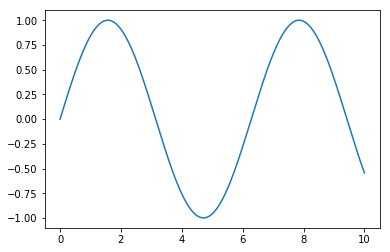

In [16]:
class TimeSeriesData():
    def __init__(self, num_points, x_min, x_max):
        self.x_min = x_min
        self.x_max = x_max
        self.num_points = num_points
        self.resolution = (x_min - x_max) / num_points
        self.x_data = np.linspace(x_min, x_max, num_points)
        self.targets = np.sin(self.x_data)
    
    def ret_true(self, x_series):
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        rand_start = np.random.rand(batch_size, 1)
        ts_start = rand_start * (self.x_max - self.x_min - (steps*self.resolution))
        batch_ts = ts_start + np.arange(0.0, steps + 1) * self.resolution
        y_batch = np.sin(batch_ts)
        
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1, steps, 1) , y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1, steps, 1) , y_batch[:,1:].reshape(-1, steps, 1)
        

ts_data = TimeSeriesData(250,0,10)
plt.plot(ts_data.x_data,ts_data.targets)

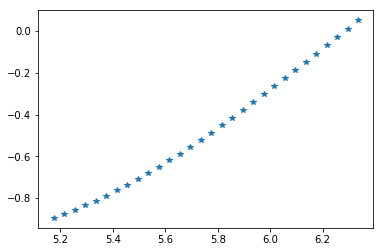

In [7]:
num_time_steps = 30
y1, y2, ts = ts_data.next_batch(1,num_time_steps,True)
plt.plot(ts.flatten()[1:],y2.flatten(),'*')

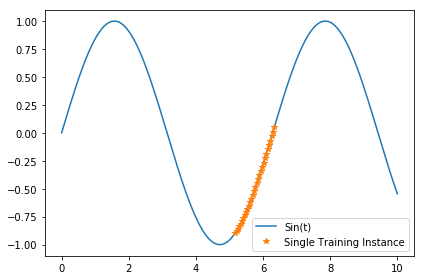

In [13]:
plt.plot(ts_data.x_data, ts_data.targets, label='Sin(t)')
plt.plot(ts.flatten()[1:], y2.flatten(),'*',label='Single Training Instance')
plt.legend()
plt.tight_layout()

In [14]:
train_inst = np.linspace(5, 5 + ts_data.resolution*(num_time_steps+1),num_time_steps+1)

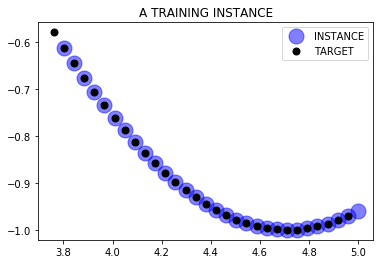

In [18]:
plt.title('A TRAINING INSTANCE')
plt.plot(train_inst[:-1],ts_data.ret_true(train_inst[:-1]),'bo',markersize=15,alpha=0.5,label='INSTANCE')
plt.plot(train_inst[1:],ts_data.ret_true(train_inst[1:]),'ko',markersize=7,label='TARGET')
plt.legend()


In [32]:
tf.reset_default_graph()

In [33]:
num_inputs = 1
num_time_steps = 30
num_neurons = 100
num_outputs = 1
learning_rate = 0.0001
num_epochs = 2000
batch_size = 1

X = tf.placeholder(tf.float32,[None,num_time_steps,num_inputs])
y = tf.placeholder(tf.float32,[None,num_time_steps,num_outputs])

cell = tf.contrib.rnn.BasicRNNCell(num_units=num_neurons,activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(cell,output_size=num_outputs)

outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_epochs):
        X_batch, y_batch = ts_data.next_batch(batch_size, num_time_steps)
        
        sess.run(train, feed_dict = {X:X_batch, y:y_batch})
        
        if iteration % 100 == 0:
            error = loss.eval(feed_dict={X:X_batch, y: y_batch})
            print(iteration, "\tMSE", error)
            
    saver.save(sess,"./rnn_time_series_model")

0 	MSE 0.3034525
100 	MSE 0.08724616
200 	MSE 0.07996995
300 	MSE 0.006747371
400 	MSE 0.00825025
500 	MSE 0.028010132
600 	MSE 0.020384718
700 	MSE 0.022742212
800 	MSE 0.0121840285
900 	MSE 0.010591667
1000 	MSE 0.012519214
1100 	MSE 0.0048765023
1200 	MSE 0.0014220091
1300 	MSE 0.008425319
1400 	MSE 0.011992467
1500 	MSE 0.0066687134
1600 	MSE 0.00013249986
1700 	MSE 0.0018574321
1800 	MSE 0.006993144
1900 	MSE 0.0019131361
